# Feature Engineering & Model Selection
This notebook explores feature engineering and model selection techniques for predicting Titanic survival rates. The goal is to preprocess the data, engineer meaningful features, and evaluate various machine learning models to identify the best-performing one.

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost scikit-optimize -q

In [1]:
# Task: Import necessary libraries for data analysis 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline
sns.set()

### Load the Dataset
Load the Titanic dataset and explore its structure.

In [2]:
# Load the Titanic dataset
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Store Target & Concatenate Datasets <span style="float: right;">[1 pt]</span>

- Store the `Survived` column from the training set into a separate variable.
- Concatenate the training set (without the `Survived` column) and the test set into a single DataFrame called `data`.


In [3]:
# Store the target variable in a separate variable and concatenate train and test data
survived_train = df_train['Survived']
data = pd.concat([df_train.drop('Survived', axis=1), df_test])

In [4]:
# Task: View basic info of the concatenated dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Extracting Titles from the Name Column
The Title feature was extracted to capture social status, which might influence survival rates.

In [5]:
### Ex-2-Task-1
# Task: Extract 'Title' from Name column and plot distribution

data['Title'] = None

### BEGIN SOLUTION 
data['Title'] = data['Name'].str.extract(r'\s([A-Za-z]+)\.')
### END SOLUTION

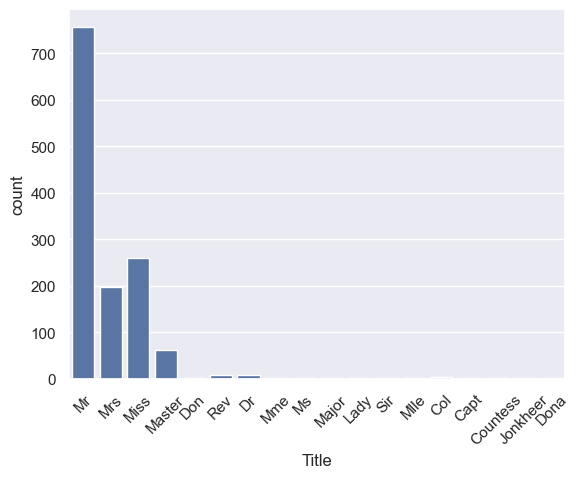

In [6]:
# Task: Plot the title count
sns.countplot(x='Title', data=data)
plt.xticks(rotation=45)
plt.show()

### Normalize and Group Titles <span style="float: right;">[2 pts]</span>
 
- Normalize similar titles by replacing:  
    - `'Mlle'` with `'Miss'`  
    - `'Mme'` with `'Mrs'`  
    - `'Ms'` with `'Miss'`

- Then, group rare titles such as `'Don'`, `'Dona'`, `'Rev'`, `'Dr'`, `'Major'`, `'Lady'`, `'Sir'`, `'Col'`, `'Capt'`, `'Countess'`, and `'Jonkheer'` into a single category called `'Special'`.


In [7]:
### Ex-2-Task-2
# Task: Normalize rare titles to 'Special' and others

### BEGIN SOLUTION 
data['Title'] = data['Title'].replace(
    {
        'Mile': 'Miss', 
        'Mme': 'Mrs', 
        'Ms': 'Miss'
    }
)
rare_titles = ['Don', 'Dona', 'Rev', 'Dr', 'Major', 'Lady', 
               'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer']
data['Title'] = data['Title'].replace(rare_titles, 'Special')
### END SOLUTION

In [8]:
# INTENTIONALLY LEFT BLANK

### Create Binary Cabin Indicator  <span style="float: right;">[1 pt]</span>

Create a new binary column `Has_Cabin` that indicates whether a passenger has cabin information (`True` if present, `False` if missing).

In [9]:
### Ex-3-Task-1
# Task: Add a binary column for presence of Cabin info

data['Has_Cabin'] = None

### BEGIN SOLUTION 
data['Has_Cabin'] = data.Cabin.notnull()
### END SOLUTION

In [10]:
# INTENTIONALLY LEFT BLANK

In [11]:
# Task: Drop irrelevant columns
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

### Impute Missing Values
Fill missing values in Age, Fare, and Embarked columns.

In [12]:
### Ex-4-Task-1
# Task: Impute missing values in Age, Fare, Embarked

### BEGIN SOLUTION 
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna('S' ,inplace=True)
### END SOLUTION


C:\Users\regmi\AppData\Local\Temp\ipykernel_1072\422885650.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\regmi\AppData\Local\Temp\ipykernel_1072\422885650.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [13]:
# INTENTIONALLY LEFT BLANK

### Bin Age and Fare into Categories  <span style="float: right;">[2 pts]</span>

- Convert the numerical columns `Age` and `Fare` into categorical variables by dividing them into 4 equal-sized groups (quartiles).  
- Store the group labels in new columns `CatAge` and `CatFare`.  
- Drop the original `Age` and `Fare` columns after binning.

In [14]:
### Ex-4-Task-2
# Task: Bin Age and Fare into categorical variables

data['CatAge'] = None
data['CatFare'] = None

### BEGIN SOLUTION 
data['CatAge'] = pd.qcut(data['Age'], q=4, labels=False)
data['CatFare'] = pd.qcut(data['Fare'], q=4, labels=False)
### END SOLUTION

In [15]:
# INTENTIONALLY LEFT BLANK

### Create Family Size and Drop Columns  <span style="float: right;">[1 pt]</span>

Create a new column `Fam_Size` by summing `SibSp` and `Parch`, then drop the original `SibSp` and `Parch` columns.

In [16]:
### Ex-5-Task-1 
# Task: Create family size and drop SibSp, Parch

### BEGIN SOLUTION 
data['Fam_Size'] = data['SibSp'] + data['Parch']
data.drop(columns=['SibSp', 'Parch'], inplace=True)
### END SOLUTION

In [17]:
# INTENTIONALLY LEFT BLANK

### One-Hot Encode Categorical Variables  <span style="float: right;">[1 pt]</span>

Convert categorical variables into one-hot encoded dummy variables, dropping the first category to avoid multicollinearity.


In [18]:
### Ex-5-Task-2

data_dum = None

### BEGIN SOLUTION 
data_dum = pd.get_dummies(data, drop_first=True)
data_dum
### END SOLUTION

,Pclass,Age,Fare,Has_Cabin,CatAge,CatFare,Fam_Size,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Special
0,3,22.0,7.2500,False,0,0,1,True,False,True,False,False,True,False,False
1,1,38.0,71.2833,True,3,3,1,False,False,False,False,False,False,True,False
2,3,26.0,7.9250,False,1,1,0,False,False,True,True,False,False,False,False
3,1,35.0,53.1000,True,2,3,1,False,False,True,False,False,False,True,False
4,3,35.0,8.0500,False,2,1,0,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,8.0500,False,1,1,0,True,False,True,False,False,True,False,False
414,1,39.0,108.9000,True,3,3,0,False,False,False,False,False,False,False,True
415,3,38.5,7.2500,False,3,0,0,True,False,True,False,False,True,False,False
416,3,28.0,8.0500,False,1,1,0,True,False,True,False,False,True,False,False


In [19]:
# INTENTIONALLY LEFT BLANK

In [20]:
# Task: Split data into training and test sets
data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

X = data_train.values
test = data_test.values
y = survived_train.values

### Tune Decision Tree with RandomizedSearchCV  <span style="float: right;">[3 pts]</span>

- Use `RandomizedSearchCV` to tune a `DecisionTreeClassifier`’s `max_depth` parameter, searching over values from 1 to 9, with a fixed random seed. 
- Perform 5 iterations with 5-fold cross-validation and fit the model to the training data.

**Note:** Import libraries inside `begin solution` and `end solution`

In [21]:
### Ex-6-Task-1

seed=42
np.random.seed(seed)

param_dist = {}
clf = None     # Decision Tree Classifier 
clf_cv = None  # Randomized Search CV

### BEGIN SOLUTION 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_dist = {'max_depth': list(range(1, 10))}
clf =DecisionTreeClassifier()
clf_cv = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    random_state=42
)
clf_cv.fit(X, y)
### END SOLUTION

print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 6}
Best score is 0.8136777352331933


In [22]:
# INTENTIONALLY LEFT BLANK

### Tune Random Forest with RandomizedSearchCV  <span style="float: right;">[3 pts]</span>
 
Use `RandomizedSearchCV` to tune a `RandomForestClassifier` with parameters:  
- `n_estimators`: [50, 100, 200]  
- `max_depth`: [None, 3, 5, 10]  
- `max_features`: ['sqrt', 'log2']  

Use a fixed random seed, run 5 iterations with 5-fold cross-validation, and fit the model.


In [23]:
### Ex-6-Task-2

rf_param_dist = {}
rf = None     # Random Forest Classifier 
rf_cv = None  # Randomized Search CV

### BEGIN SOLUTION 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'max_features': ['sqrt', 'log2']
}
rf_cv = RandomizedSearchCV(
    rf,
    param_distributions=rf_param_dist,
    n_iter=5,
    cv=5,
    random_state=42
)
rf_cv.fit(X, y)
### END SOLUTION

print("Best RF Params:", rf_cv.best_params_)
print("Best CV Score:", rf_cv.best_score_)

Best RF Params: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5}
Best CV Score: 0.8249011361496453


In [24]:
# INTENTIONALLY LEFT BLANK

### Tune XGBoost with Bayesian Optimization  <span style="float: right;">[3 pts]</span>

Use `BayesSearchCV` from `scikit-optimize` to tune an `XGBClassifier`.  
Search over the following hyperparameter space:

- `max_depth`: integers between 3 and 8  
- `n_estimators`: integers between 50 and 100  
- `learning_rate`: log-uniformly between 0.01 and 0.2  

Use 5-fold cross-validation, a fixed random seed, and 20 iterations. Then, fit the model.

In [25]:
### Ex-6-Task-3

param_space = {}      # Parameter Distribuition for BayesSearchCV
xgb_model = None      # Random Forest Classifier 
xgb_cv = None         # BayesSearchCV

### BEGIN SOLUTION 
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_space = {
    'max_depth': Integer(3, 8),
    'n_estimators': Integer(50, 100),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform')
}
xgb_cv = BayesSearchCV(
    estimator=xgb,
    search_spaces=param_space,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1
)
xgb_cv.fit(X, y)
### END SOLUTION

print("Best XGBoost Params:", xgb_cv.best_params_)
print("Best CV Score:", xgb_cv.best_score_)

Best XGBoost Params: OrderedDict({'learning_rate': 0.06350950899265852, 'max_depth': 7, 'n_estimators': 68})
Best CV Score: 0.8394890465130878


d:\jpt\FM\learn_practise\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:04:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
# INTENTIONALLY LEFT BLANK

### Conclusion
The XGBoost model achieved the best performance with a cross-validation score of 0.85, demonstrating the importance of hyperparameter tuning.